# Visualizing Results

## Plot histogram <a name='histogram'></a>

The following function visualizes the data from a quantum circuit executed on a system or simulator.

`plot_histogram(data)`

For example, make a two-qubit Bell state:

In [1]:
from qiskit_aer import Aer

from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = Aer.get_backend('qasm_simulator') # the device to run on
circ = bell.compose(meas)
result = backend.run(circ, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'11': 493, '00': 507}


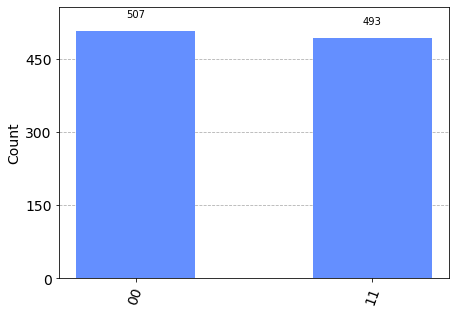

In [3]:
plot_histogram(counts)

### Options when plotting a histogram

Use the following options for `plot_histogram()` to adjust the output graph.

* `legend`: Provides a label for the executions. It takes a list of strings used to label each execution's results. This is mostly useful when plotting multiple execution results in the same histogram
* `sort`: Adjusts the order the bars in the histogram are rendered. It can be set to either ascending order with `asc` or descending order with `desc`
* `number_to_keep`: Takes an integer for the number of terms to show. The rest are grouped together in a single bar called "rest"
* `color`: Adjusts the color of the bars; takes a string or a list of strings for the colors to use for the bars for each execution.
* `bar_labels`: Adjusts whether labels are printed above the bars
* `figsize`: Takes a tuple of the size in inches to make the output figure

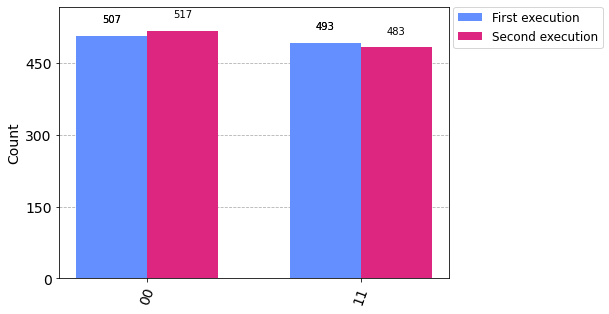

In [4]:
# Execute two-qubit Bell state again
second_result = backend.run(circ, shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)

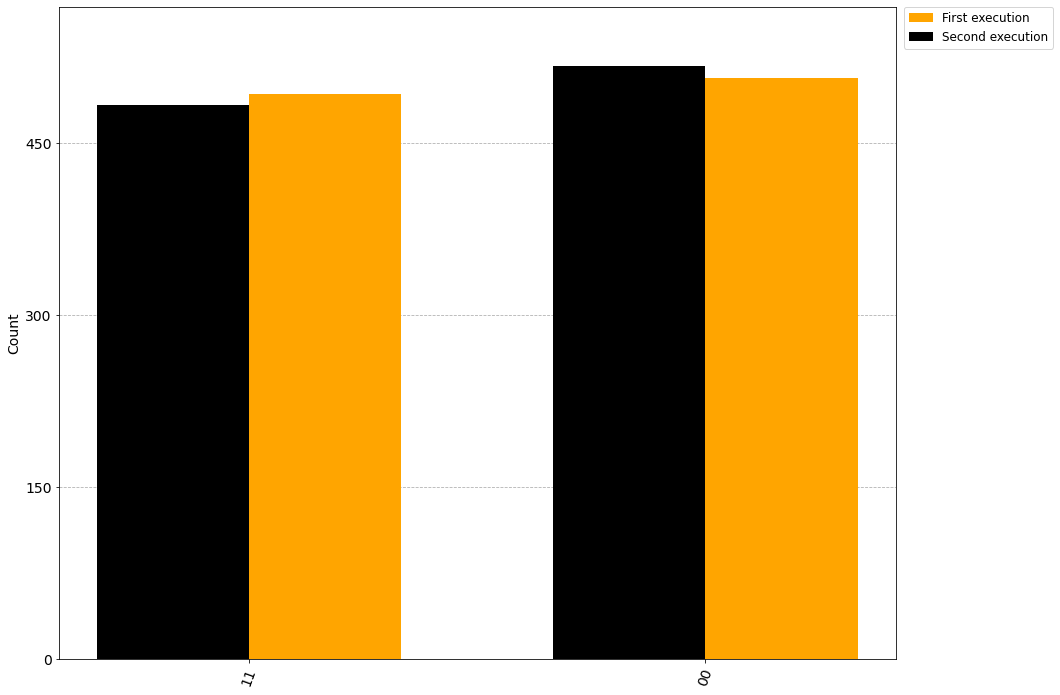

In [5]:
plot_histogram([counts, second_counts], legend=legend, sort='desc', figsize=(15,12),
               color=['orange', 'black'], bar_labels=False)

### Use the output from plot_histogram()

When using the `plot_histogram()` function, it returns a `matplotlib.Figure` for the rendered visualization. Jupyter notebooks understand this return type and render it properly, but when running outside of Jupyter,this feature is not automatic. However, the `matplotlib.Figure` class natively has methods to both display and save the visualization. You can call `.show()` on the returned object from `plot_histogram()` to open the image in a new window (assuming your configured matplotlib backend is interactive). Alternatively, call `.savefig('out.png')` to save the figure to `out.png`. The `savefig()` method takes a path so you can adjust the location and filename where you're saving the output.